# Tutorial 3: Eigen Values and Eigen Vectors
**Week 2, Day 2: Linear Algebra**

**This Tutorial is taken from Neuromatch Academy**

The orginal code can be found in the following link: https://compneuro.neuromatch.io/tutorials/W0D3_LinearAlgebra/student/W0D3_Tutorial2.html

__Content creators:__ Ella Batty


__Content reviewers:__ Keith van Antwerp, Aderogba Bayo, Anoop Kulkarni, Pooya Pakarian


__Production editors:__ Siddharth Suresh, Ella Batty  

**Our 2022 Sponsor**

<p align=><img src='https://upload.wikimedia.org/wikipedia/en/thumb/5/5c/Logo_of_International_Brain_Research_Organization.jpg/220px-Logo_of_International_Brain_Research_Organization.jpg'/></p>

---
# Tutorial Objectives

*Estimated timing of tutorial: 1 hour, 35 minutes*

During today, we will learn the basics of linear algebra, focusing on the topics that underlie the material on future days in the course. In this tutorial, we focus on matrices: their definition, their properties & operations, and especially on a geometrical intuition of them. 

By the end of this tutorial, you will be able to :
*  Perform matrix multiplication by hand
*  Define what eigenvalues/eigenvectors are




**Code Credit:**

Some elements of this problem set are from or inspired by https://openedx.seas.gwu.edu/courses/course-v1:GW+EngComp4+2019/about. In particular, we are using their `plot_linear_transformation` and `plot_linear_transformations` functions.

**License**:

Code under BSD 3-Clause License © 2019 Lorena A. Barba, Tingyu Wang. THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

---
# Setup

In [4]:
# Imports

import numpy as np
import matplotlib.pyplot as plt

In [5]:
# @title Figure settings
import ipywidgets as widgets  # interactive display
from ipywidgets import fixed
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")

In [6]:
# @title Plotting functions
import numpy
from numpy.linalg import inv, eig
from math import ceil
from matplotlib import pyplot, ticker, get_backend, rc
from mpl_toolkits.mplot3d import Axes3D
from itertools import cycle

_int_backends = ['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg',
                 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo',
                 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo']
_backend = get_backend()   # get current backend name

# shrink figsize and fontsize when using %matplotlib notebook
if _backend in _int_backends:
  fontsize = 4
  fig_scale = 0.75
else:
  fontsize = 5
  fig_scale = 1

grey = '#808080'
gold = '#cab18c'        # x-axis grid
lightblue = '#0096d6'   # y-axis grid
green = '#008367'       # x-axis basis vector
red = '#E31937'         # y-axis basis vector
darkblue = '#004065'

pink, yellow, orange, purple, brown = '#ef7b9d', '#fbd349', '#ffa500', '#a35cff', '#731d1d'

quiver_params = {'angles': 'xy',
                 'scale_units': 'xy',
                 'scale': 1,
                 'width': 0.012}

grid_params = {'linewidth': 0.5,
               'alpha': 0.8}

def set_rc(func):
  def wrapper(*args, **kwargs):
    rc('font', family='serif', size=fontsize)
    rc('figure', dpi=200)
    rc('axes', axisbelow=True, titlesize=5)
    rc('lines', linewidth=1)
    func(*args, **kwargs)
  return wrapper

@set_rc
def plot_vector(vectors, tails=None):
  ''' Draw 2d vectors based on the values of the vectors and the position of their tails.

  Parameters
  ----------
  vectors : list.
    List of 2-element array-like structures, each represents a 2d vector.

  tails : list, optional.
    List of 2-element array-like structures, each represents the coordinates of the tail
    of the corresponding vector in vectors. If None (default), all tails are set at the
    origin (0,0). If len(tails) is 1, all tails are set at the same position. Otherwise,
    vectors and tails must have the same length.

  Examples
  --------
  >>> v = [(1, 3), (3, 3), (4, 6)]
  >>> plot_vector(v)      # draw 3 vectors with their tails at origin
  >>> t = [numpy.array((2, 2))]
  >>> plot_vector(v, t)   # draw 3 vectors with their tails at (2,2)
  >>> t = [[3, 2], [-1, -2], [3, 5]]
  >>> plot_vector(v, t)   # draw 3 vectors with 3 different tails

  '''
  vectors = numpy.array(vectors)
  assert vectors.shape[1] == 2, "Each vector should have 2 elements."
  if tails is not None:
    tails = numpy.array(tails)
    assert tails.shape[1] == 2, "Each tail should have 2 elements."
  else:
    tails = numpy.zeros_like(vectors)

  # tile vectors or tails array if needed
  nvectors = vectors.shape[0]
  ntails = tails.shape[0]
  if nvectors == 1 and ntails > 1:
    vectors = numpy.tile(vectors, (ntails, 1))
  elif ntails == 1 and nvectors > 1:
    tails = numpy.tile(tails, (nvectors, 1))
  else:
    assert tails.shape == vectors.shape, "vectors and tail must have a same shape"

  # calculate xlimit & ylimit
  heads = tails + vectors
  limit = numpy.max(numpy.abs(numpy.hstack((tails, heads))))
  limit = numpy.ceil(limit * 1.2)   # add some margins

  figsize = numpy.array([2,2]) * fig_scale
  figure, axis = pyplot.subplots(figsize=figsize)
  axis.quiver(tails[:,0], tails[:,1], vectors[:,0], vectors[:,1], color=darkblue,
                  angles='xy', scale_units='xy', scale=1)
  axis.set_xlim([-limit, limit])
  axis.set_ylim([-limit, limit])
  axis.set_aspect('equal')

  # if xticks and yticks of grid do not match, choose the finer one
  xticks = axis.get_xticks()
  yticks = axis.get_yticks()
  dx = xticks[1] - xticks[0]
  dy = yticks[1] - yticks[0]
  base = max(int(min(dx, dy)), 1)   # grid interval is always an integer
  loc = ticker.MultipleLocator(base=base)
  axis.xaxis.set_major_locator(loc)
  axis.yaxis.set_major_locator(loc)
  axis.grid(True, **grid_params)

  # show x-y axis in the center, hide frames
  axis.spines['left'].set_position('center')
  axis.spines['bottom'].set_position('center')
  axis.spines['right'].set_color('none')
  axis.spines['top'].set_color('none')

@set_rc
def plot_transformation_helper(axis, matrix, *vectors, unit_vector=True, unit_circle=False, title=None):
  """ A helper function to plot the linear transformation defined by a 2x2 matrix.

  Parameters
  ----------
  axis : class matplotlib.axes.Axes.
    The axes to plot on.

  matrix : class numpy.ndarray.
    The 2x2 matrix to visualize.

  *vectors : class numpy.ndarray.
    The vector(s) to plot along with the linear transformation. Each array denotes a vector's
    coordinates before the transformation and must have a shape of (2,). Accept any number of vectors.

  unit_vector : bool, optional.
    Whether to plot unit vectors of the standard basis, default to True.

  unit_circle: bool, optional.
    Whether to plot unit circle, default to False.

  title: str, optional.
    Title of the plot.

  """
  assert matrix.shape == (2,2), "the input matrix must have a shape of (2,2)"
  grid_range = 20
  x = numpy.arange(-grid_range, grid_range+1)
  X_, Y_ = numpy.meshgrid(x,x)
  I = matrix[:,0]
  J = matrix[:,1]
  X = I[0]*X_ + J[0]*Y_
  Y = I[1]*X_ + J[1]*Y_
  origin = numpy.zeros(1)

  # draw grid lines
  for i in range(x.size):
    axis.plot(X[i,:], Y[i,:], c=gold, **grid_params)
    axis.plot(X[:,i], Y[:,i], c=lightblue, **grid_params)

  # draw (transformed) unit vectors
  if unit_vector:
    axis.quiver(origin, origin, [I[0]], [I[1]], color=green, **quiver_params)
    axis.quiver(origin, origin, [J[0]], [J[1]], color=red, **quiver_params)

  # draw optional vectors
  color_cycle = cycle([pink, darkblue, orange, purple, brown])
  if vectors:
    for vector in vectors:
      color = next(color_cycle)
      vector_ = matrix @ vector.reshape(-1,1)
      axis.quiver(origin, origin, [vector_[0]], [vector_[1]], color=color, **quiver_params)

  # draw optional unit circle
  if unit_circle:
    alpha =  numpy.linspace(0, 2*numpy.pi, 41)
    circle = numpy.vstack((numpy.cos(alpha), numpy.sin(alpha)))
    circle_trans = matrix @ circle
    axis.plot(circle_trans[0], circle_trans[1], color=red, lw=0.8)

  # hide frames, set xlimit & ylimit, set title
  limit = 4
  axis.spines['left'].set_position('center')
  axis.spines['bottom'].set_position('center')
  axis.spines['left'].set_linewidth(0.3)
  axis.spines['bottom'].set_linewidth(0.3)
  axis.spines['right'].set_color('none')
  axis.spines['top'].set_color('none')
  axis.set_xlim([-limit, limit])
  axis.set_ylim([-limit, limit])
  if title is not None:
    axis.set_title(title)

@set_rc
def plot_linear_transformation(matrix, *vectors, name = None, unit_vector=True, unit_circle=False):
  """ Plot the linear transformation defined by a 2x2 matrix using the helper
  function plot_transformation_helper(). It will create 2 subplots to visualize some
  vectors before and after the transformation.

  Parameters
  ----------
  matrix : class numpy.ndarray.
    The 2x2 matrix to visualize.

  *vectors : class numpy.ndarray.
    The vector(s) to plot along with the linear transformation. Each array denotes a vector's
    coordinates before the transformation and must have a shape of (2,). Accept any number of vectors.

  unit_vector : bool, optional.
    Whether to plot unit vectors of the standard basis, default to True.

  unit_circle: bool, optional.
    Whether to plot unit circle, default to False.

  """
  figsize = numpy.array([4,2]) * fig_scale
  figure, (axis1, axis2) = pyplot.subplots(1, 2, figsize=figsize)
  plot_transformation_helper(axis1, numpy.identity(2), *vectors, unit_vector=unit_vector, unit_circle=unit_circle, title='Before transformation')
  plot_transformation_helper(axis2, matrix, *vectors, unit_vector=unit_vector, unit_circle=unit_circle, title='After transformation')
  if name is not None:
    figure.suptitle(f'Population {name}')


def plot_eig_vec_transform(W):
  classic = 'k'
  vec_names = ['a', 'b','c','d','e','f','g', 'h']

  _, vecs = np.linalg.eig(W)
  vecs = vecs.T

  fig, axes = plt.subplots(1, 2, figsize=(2, 1))
  colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

  for i in range(2):
    axes[i].set(xlim=[-3.5, 3.5], ylim=[-3.5,3.5])
    axes[i].axis('Off')
    axes[i].plot([0, 0], [-3.5, 3.5], classic, alpha=.4)
    axes[i].plot([-3.5, 3.5], [0, 0], classic, alpha=.4)

  for i_vec, vec in enumerate(vecs):
    axes[0].arrow(0, 0, vec[0], vec[1], head_width=.2, facecolor=colors[i_vec], edgecolor=colors[i_vec], length_includes_head=True)
    axes[0].annotate(vec_names[i_vec], xy=(vec[0]+np.sign(vec[0])*.15, vec[1]+np.sign(vec[1])*.15), color=colors[i_vec])

    transformed_vec = np.matmul(W, vec)
    axes[1].arrow(0, 0, transformed_vec[0], transformed_vec[1], head_width=.2, facecolor=colors[i_vec], edgecolor=colors[i_vec], length_includes_head=True)
    axes[1].annotate(vec_names[i_vec], xy=(transformed_vec[0]+np.sign(transformed_vec[0])*.15, transformed_vec[1]+np.sign(transformed_vec[1])*.15), color=colors[i_vec])

  axes[0].set_title('Before')
  axes[1].set_title('After')

For further information, this video covers eigenvalues and eigenvectors: https://youtube.com/watch?v=l-c7ptT7znM

Eigenvectors, $\mathbf{v}$ of a matrix $\mathbf{W}$ are vectors that, when multipled by the matrix, equal a scalar multiple of themselves. That scalar multiple is the corresponding eigenvalue, $\lambda$.

\begin{equation}
\mathbf{W}\mathbf{v} = \lambda\mathbf{v}
\end{equation}

If we have one eigenvector for a matrix, we technically have an infinite amount: every vector along the span of that eigenvector is also an eigenvector. So, we often use the unit vector in that direction to summarize all the eigenvectors along that line. 

We can find the eigenvalues and eigenvectors of a matrix in numpy using `np.linalg.eig`.

## Think! 1: Identifying transformations from eigenvectors

Earlier, we learned how to think about linear transformations in terms of where the standard basis vectors end up. We can also think about them in terms of eigenvectors. 

Just by looking at eigenvectors before and after a transformation, can you describe what the transformation is in words? Try for each of the two plots below.

Note that I show an eigenvector for every eigenvalue. The x/y limits do not change in before vs after (so eigenvectors are showed scaled by the eigenvalues).

Here are some transformation words to jog your memory and guide discussion: contraction, expansion, horizontal vs vertical, projection onto an axis, reflection, and rotation.

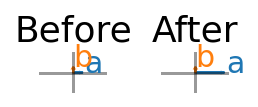

In [7]:
# @title
# @markdown Execute this cell to visualize vectors

W = np.array([[3, 0], [0, 1]])
plot_eig_vec_transform(W)

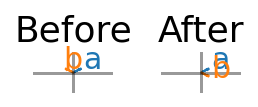

In [8]:
# @title
# @markdown Execute this cell to visualize vectors

W = np.array([[0, 1], [1, 0]])
plot_eig_vec_transform(W)

[*Click for solution*](https://github.com/NeuromatchAcademy/precourse/tree/main//tutorials/W0D3_LinearAlgebra/solutions/W0D3_Tutorial2_Solution_a6de96a6.py)



As we saw above, looking at how just the eigenvectors change after a transformation can be very informative about what that transformation was. 

---
# Summary


In this tutorial, you have learned how to think about matrices from the perspective of solving a system of equations and as a linear transformation of space. You have learned:
- What eigenvalues/eigenvectors are and why they might be useful

We will be using this knowledge in many of the days in the course.